<a href="https://colab.research.google.com/github/ByungChul-Lee/ai_study_meeting/blob/main/tf_DeepL_fashion_MNist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = ( x_train - 0.0) / (255.0 - 0.0)
x_test = ( x_test - 0.0) /(255.0 - 0.0)


In [ ]:
#t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
#t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape =(28, 28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, t_train, epochs = 30, validation_split= 0.3)

Epoch 1/30
1313/1313 [==============================] - 9s 6ms/step - loss: 0.5475 - accuracy: 0.8091 - val_loss: 0.4357 - val_accuracy: 0.8484
Epoch 2/30
1313/1313 [==============================] - 6s 5ms/step - loss: 0.4027 - accuracy: 0.8575 - val_loss: 0.3836 - val_accuracy: 0.8638
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3606 - accuracy: 0.8700 - val_loss: 0.3717 - val_accuracy: 0.8632
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3323 - accuracy: 0.8778 - val_loss: 0.3744 - val_accuracy: 0.8681
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3145 - accuracy: 0.8847 - val_loss: 0.3350 - val_accuracy: 0.8787
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2961 - accuracy: 0.8919 - val_loss: 0.3335 - val_accuracy: 0.8784
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2854 - accuracy: 0.8934 - val_loss: 0.3401 - val_accuracy:

In [ ]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.8803


[0.4286806583404541, 0.880299985408783]

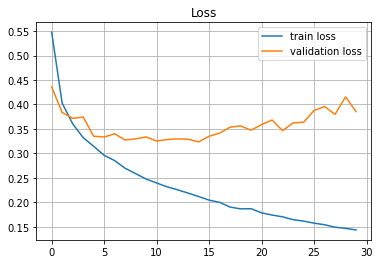

In [ ]:
plt.title('Loss')
plt.grid()
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.show()

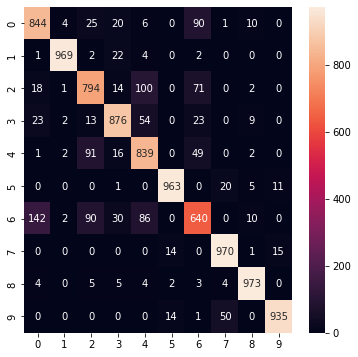

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))
predicted_value  = model.predict(x_test)

cm = confusion_matrix(t_test, np.argmax(predicted_value, axis = -1))
sns.heatmap(cm, annot= True, fmt ='d')
plt.show()

In [ ]:
print(cm)
print('\n')

for i in range(10):
  print(('label = %d\t(%d/%d)\taccuracy = %.3f')%
        (i, np.max(cm[i]), np.sum(cm[i]),
         np.max(cm[i])/np.sum(cm[i])))

[[844   4  25  20   6   0  90   1  10   0]
 [  1 969   2  22   4   0   2   0   0   0]
 [ 18   1 794  14 100   0  71   0   2   0]
 [ 23   2  13 876  54   0  23   0   9   0]
 [  1   2  91  16 839   0  49   0   2   0]
 [  0   0   0   1   0 963   0  20   5  11]
 [142   2  90  30  86   0 640   0  10   0]
 [  0   0   0   0   0  14   0 970   1  15]
 [  4   0   5   5   4   2   3   4 973   0]
 [  0   0   0   0   0  14   1  50   0 935]]


label = 0	(844/1000)	accuracy = 0.844
label = 1	(969/1000)	accuracy = 0.969
label = 2	(794/1000)	accuracy = 0.794
label = 3	(876/1000)	accuracy = 0.876
label = 4	(839/1000)	accuracy = 0.839
label = 5	(963/1000)	accuracy = 0.963
label = 6	(640/1000)	accuracy = 0.640
label = 7	(970/1000)	accuracy = 0.970
label = 8	(973/1000)	accuracy = 0.973
label = 9	(935/1000)	accuracy = 0.935
